<a href="https://colab.research.google.com/github/Maithreya-100/Internship/blob/main/Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hand Written Digit Prediction - Classification Analysis

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents

##Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Import Data


In [3]:
from sklearn.datasets import load_digits

In [4]:
df = load_digits()

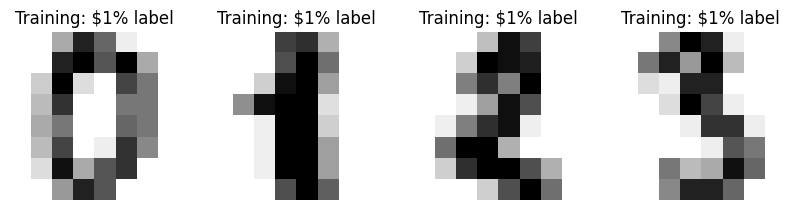

In [11]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: $1% label")

##Data Preprocessing

In [12]:
df.images.shape

(1797, 8, 8)

In [13]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
df.images[0].shape

(8, 8)

In [15]:
len(df.images)

1797

In [17]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [18]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [19]:
data[0].shape

(64,)

In [20]:
data.shape

(1797, 64)

##Scaling Image data

In [21]:
data.min()

0.0

In [22]:
data.max()

16.0

In [23]:
data = data/16

In [25]:
data.min()

0.0

In [26]:
data.max()

1.0

In [27]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

##Train Test Spilt

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,df.target, test_size=0.3)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()

In [34]:
rf.fit(X_train,y_train)

RandomForestClassifier()

##Predict Test data

In [35]:
y_pred = rf.predict(X_test)

In [36]:
y_pred

array([2, 8, 0, 4, 1, 9, 7, 0, 6, 0, 7, 0, 1, 1, 9, 4, 2, 6, 0, 7, 2, 3,
       5, 3, 0, 8, 5, 4, 7, 9, 2, 8, 7, 5, 1, 8, 5, 9, 9, 4, 2, 3, 4, 4,
       6, 5, 3, 5, 0, 8, 4, 5, 7, 9, 0, 2, 1, 5, 8, 3, 0, 9, 6, 0, 0, 7,
       3, 6, 5, 4, 2, 7, 4, 9, 2, 8, 3, 2, 1, 3, 1, 0, 5, 1, 6, 4, 1, 4,
       8, 5, 3, 6, 4, 7, 5, 9, 2, 3, 9, 5, 0, 7, 8, 7, 3, 4, 3, 0, 8, 9,
       9, 7, 1, 1, 3, 8, 6, 1, 8, 8, 5, 4, 8, 2, 8, 1, 6, 1, 4, 2, 5, 2,
       2, 5, 8, 9, 8, 1, 2, 2, 5, 4, 4, 3, 4, 8, 5, 9, 2, 3, 2, 8, 9, 5,
       0, 9, 9, 6, 0, 6, 5, 9, 6, 4, 4, 4, 1, 0, 7, 0, 8, 7, 4, 9, 2, 7,
       6, 8, 5, 1, 0, 2, 0, 5, 6, 1, 0, 3, 5, 7, 8, 3, 4, 1, 5, 1, 5, 5,
       5, 5, 3, 9, 0, 9, 6, 0, 5, 1, 4, 1, 7, 3, 0, 7, 7, 2, 5, 7, 3, 6,
       1, 9, 9, 7, 7, 8, 7, 5, 0, 8, 9, 7, 4, 5, 5, 6, 9, 8, 7, 6, 8, 9,
       1, 4, 6, 6, 5, 5, 1, 2, 3, 3, 7, 6, 2, 2, 0, 1, 5, 6, 8, 0, 1, 2,
       5, 5, 2, 7, 9, 2, 6, 7, 9, 2, 7, 7, 1, 1, 3, 5, 7, 1, 5, 4, 6, 3,
       4, 9, 0, 1, 6, 8, 5, 9, 8, 9, 6, 4, 6, 3, 6,

##Model Accuracy

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
confusion_matrix(y_test,y_pred)

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 44,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 61,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  1, 63,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 57]])

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       0.98      0.98      0.98        59
           2       1.00      0.98      0.99        53
           3       1.00      0.94      0.97        47
           4       0.98      0.97      0.98        63
           5       0.98      0.94      0.96        67
           6       1.00      1.00      1.00        55
           7       0.96      1.00      0.98        52
           8       0.93      1.00      0.97        42
           9       0.95      0.98      0.97        58

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

